In [7]:
import pandas as pd
import pickle as pk
import numpy as np
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.feature_extraction.text import CountVectorizer
from keras.models import load_model

### Data pre-processor ###

# Load vectorizer
with open("vectorizer.pkl", 'rb') as fid:
    vectorizer_trained = pk.load(fid)

# Load model
trained_model = load_model('News_classifier_model.h5')

# Load categories
with open("categ.pkl", 'rb') as fid:
    categ = pk.load(fid)

# Parsing text + cleaning + stemm
def parse_out_text(all_text):
    
    # clean punctuation, make lower case and remove stopwords
    text_string = all_text.translate(str.maketrans("", "", string.punctuation)).split(" ")
    text_string = [word.lower() for word in text_string if word.lower() not in stopwords.words('english')]
    
    # Stemm text
    stemmer = SnowballStemmer("english")
    stemmed = [stemmer.stem(word) for  word in text_string]
    words = " ".join(stemmed) 
    return words

### Data prediction ###

def predict_category(text_to_predict):
    
    # Pre-process data and make prediction
    prepared_text = parse_out_text(text_to_predict)
    feat_array = vectorizer_trained.transform([prepared_text]).toarray()
    result = trained_model.predict(feat_array)[0]
    
    # Create results dataframe
    df_result = pd.DataFrame({
        'Category':categ,
        'Probability':result
    }).sort_values('Probability',ascending=False).head(10)
    
    # Generate output
    df_result['Probability'].astype(float)
    
    # plot bar chart
    df_result.plot(kind='barh', x='Category',y='Probability',figsize=(8,6));
    
    # Inverting y axis to have a top-down display
    plt.gca().invert_yaxis()
    plt.xlim(0,1);
    
    # Creating output
    output = str(df_result['Category'].iloc[0])+': '+str(round(df_result['Probability'].iloc[0]*100,1))+'%'
    return output

'SCIENCE: 71.3%'

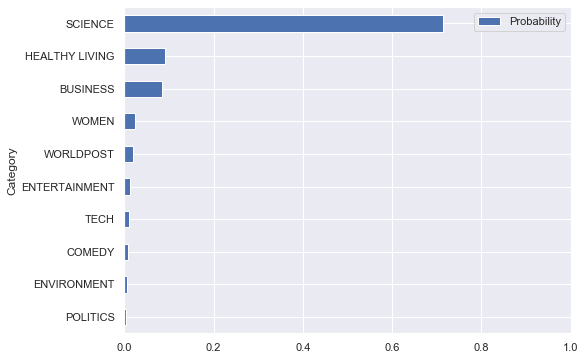

In [9]:
sample = 'SpaceX launched successfully and on its way to the ISS'
predict_category(sample)